In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
#Estilo de graficas de matplotlib:
plt.style.use('dark_background')
#Color de fondo
plt.rcParams['figure.facecolor'] = (31/255, 31/255, 31/255)
# Cambiar a colores oscuros plotly
dark_colors = px.colors.qualitative.Dark24


output_steam_games=pd.read_parquet('Dataset_Limpio/output_steam_games.parquet')
user_items=pd.read_parquet('Dataset_Limpio/user_items.parquet')
user_reviews=pd.read_parquet('Dataset_Limpio/user_reviews.parquet')

In [ ]:
pip install plotly

# Veamos la distribucion de juegos por genero y año

In [3]:
# Crear una lista de diccionarios para cada combinación de género y año
genre_year_list = [{'game_name': game, 'genre': genre, 'año_lanzamiento': year}
                   for game, genres, year in zip(output_steam_games['app_name'], output_steam_games['genres'], output_steam_games['año_lanzamiento'])
                   for genre in genres]

# Crear un DataFrame a partir de la lista de diccionarios
genres_df = pd.DataFrame(genre_year_list)

# Contar la frecuencia de cada género por año
genre_counts_by_year = genres_df.groupby(['año_lanzamiento', 'genre']).size().reset_index(name='count')

In [4]:
# Crear el treemap
fig = px.treemap(genre_counts_by_year, 
                 path=['genre','año_lanzamiento'], 
                 values='count',
                 title='Juegos por Genero y Año',
                 color_discrete_sequence=px.colors.qualitative.Set3,  # Paleta de colores específica
                 width=800, height=600)


In [5]:
# Cambiar a colores oscuros
dark_bg_color = '#1E1E1E'
text_color = 'white'
title_color = 'white'
border_color = 'white'
dark_colors = px.colors.qualitative.Dark24

# Ajustar estilo del gráfico
fig.update_layout(
    template='plotly_dark',
    paper_bgcolor=dark_bg_color,
    font_color=text_color,
    title_font_color=title_color,
    title_font_size=24,
    title_font_family='Arial',
    title_x=0.5,
    title_y=0.95,
    margin=dict(t=50, l=10, r=10, b=10),
    showlegend=False,
    treemapcolorway=dark_colors,
)
# Mostrar el treemap
fig.show()

### Conclusiones

Se puede ver que la mayoria de los juegos caen en los generos:
* Indie
* Action
* Casual
* Strategy
* Simulation
* Adventure
* RPG

In [6]:
print("Ultimo año con un registro:",output_steam_games['año_lanzamiento'].max())

Ultimo año con un registro: 2021


Teniendo en cuenta que tenemos juegos desarrollados en 2021, podemos decir que los años en donde mas se han desarrollado juegos son:
1) 2017

2) 2016

3) 2015

## Veamos los juegos mas jugados

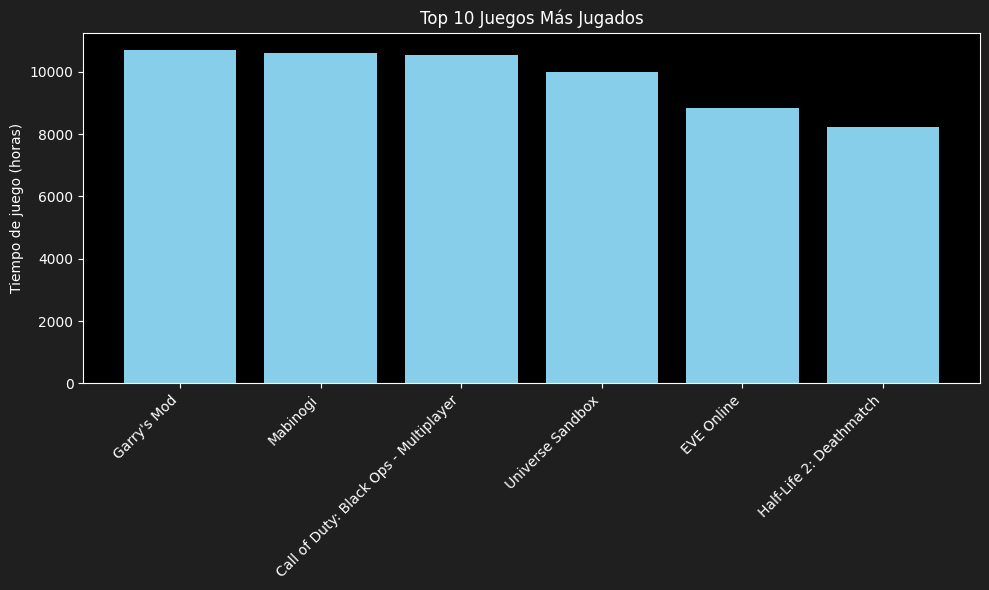

In [7]:
# Obtener el top 10 de juegos más jugados
top_10_games = user_items.nlargest(10, 'playtime_forever')

#Pasamos a horas
top_10_games['playtime_forever']=top_10_games['playtime_forever']/60

# Ordenar el DataFrame por playtime_forever para que la gráfica sea más clara
top_10_games = top_10_games.sort_values(by='playtime_forever', ascending=False)

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
plt.bar(top_10_games['item_name'], top_10_games['playtime_forever'], color='skyblue')
plt.ylabel('Tiempo de juego (horas)')
plt.title('Top 10 Juegos Más Jugados')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para mayor legibilidad
plt.tight_layout()

# Mostrar la gráfica
plt.show()

## Y veamos los juegos mas comprados
(Esto se hizo analizando la cantidad de veces que aparece el item por usuario)

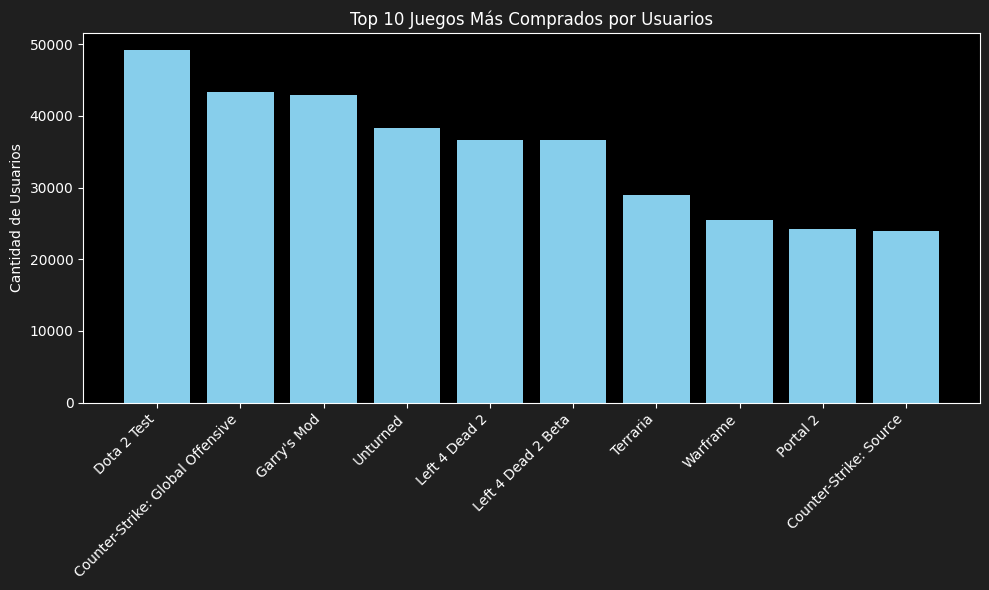

In [8]:
# Contar cuántos usuarios tienen cada juego
user_counts_per_game = user_items.groupby('item_name')['user_id'].nunique().reset_index(name='user_count')

# Obtener el top 10 de juegos más comprados
top_10_purchased_games = user_counts_per_game.nlargest(10, 'user_count')

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
plt.bar(top_10_purchased_games['item_name'], top_10_purchased_games['user_count'], color='skyblue')
plt.ylabel('Cantidad de Usuarios')
plt.title('Top 10 Juegos Más Comprados por Usuarios')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para mayor legibilidad
plt.tight_layout()

# Mostrar la gráfica
plt.show()

## Ahora veremos las reacciones de los usuarios a los juegos

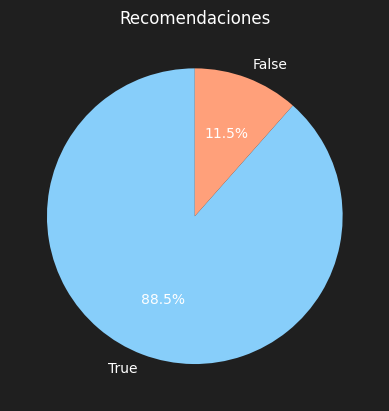

In [11]:
# Contar la frecuencia de cada categoría
recomends_count = user_reviews['recommend'].value_counts()

# Crear una gráfica de pastel
plt.pie(recomends_count,labels=recomends_count.index, colors=['lightskyblue', 'lightsalmon'], autopct='%1.1f%%', startangle=90)

# Añadir un título
plt.title('Recomendaciones')

# Mostrar la gráfica
plt.show()

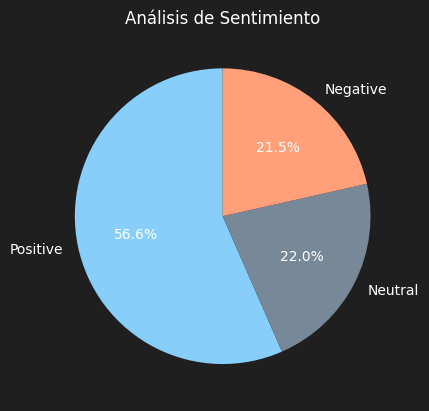

In [ ]:
# Contar la frecuencia de cada categoría
sentiment_counts = user_reviews['sentiment_analysis'].value_counts()

# Crear una gráfica de pastel
plt.pie(sentiment_counts, labels=['Positive', 'Neutral', 'Negative'], colors=['lightskyblue', 'lightslategray', 'lightsalmon'], autopct='%1.1f%%', startangle=90)

# Añadir un título
plt.title('Análisis de Sentimiento')

# Mostrar la gráfica
plt.show()

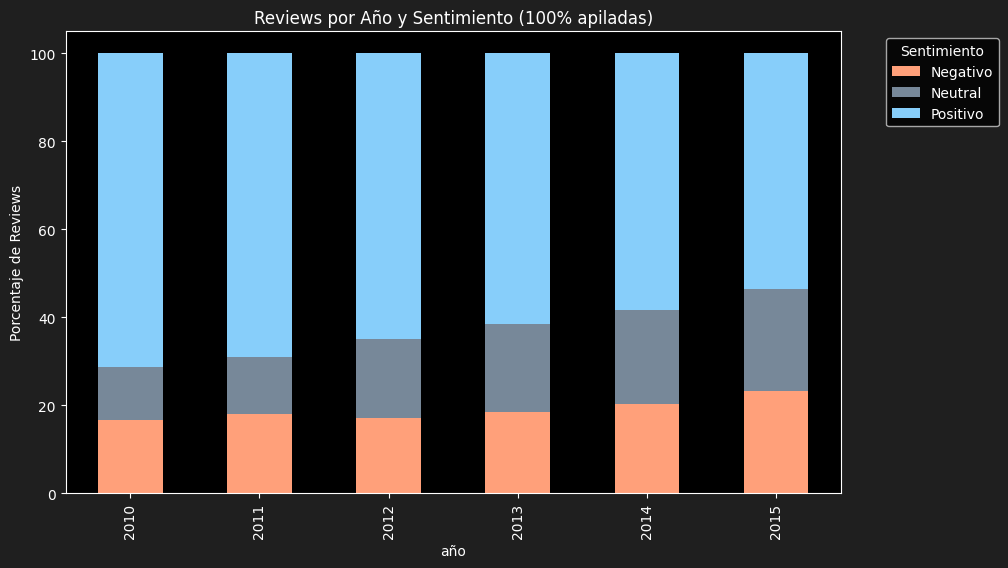

In [10]:
# Agrupar por año y contar el número de reviews para cada combinación de año y sentimiento
grouped_data = user_reviews.groupby(['año', 'sentiment_analysis']).size().unstack()

# Normalizar los valores para obtener porcentajes
grouped_data_percentage = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

#Ajustamos colores para que coincidan con los anteriores:
colors={2:'lightskyblue', 1:'lightslategray', 0:'lightsalmon'}
# Crear una gráfica de barras apiladas al 100%
ax = grouped_data_percentage.plot(kind='bar', stacked=True, color=[colors[col] for col in grouped_data_percentage.columns], figsize=(10, 6))

# Añadir etiquetas y título
plt.ylabel('Porcentaje de Reviews')
plt.title('Reviews por Año y Sentimiento (100% apiladas)')

# Añadir leyenda
plt.legend(['Negativo', 'Neutral','Positivo'],title='Sentimiento', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar la gráfica
plt.show()

### Conclusiones

Se ve claramente en las graficas que predominan las reviews positivas por sobre las negativas, conmparandola con una distribucion normal. Esto podria deberse a varios factores:

* Los usuarios podrían dar reviews de juegos que les han gustado, sobre los que no.
* Los juegos están cuidadosamente desarrollados y proporcionan entretenimiento a la mayoria de usuarios.
* El sistema de recomendaciones vigente de Steam funciona eficazmente, generando reviews positivas.
* Steam dispone de un filtro de juegos que garantiza que únicamente los desarrolladores que cumplen con ciertos estándares puedan publicar sus juegos en la plataforma, evitando así la presencia de contenido de baja calidad.